In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Missing completely at random

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [8]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)
df['cabin_null'].mean()

0.7710437710437711

In [9]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

# Mean/mode/Median imputation
when should we apply? Mean/Median imputaion has asssumption data are missing completely at random(MCAR).
we solve this by replacing the NAN with the most frequent occurence of variables.

In [11]:
df=pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
##Lets go & see the percentage of missing value
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [13]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [14]:
median=df.Age.median()
median

28.0

In [17]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [18]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

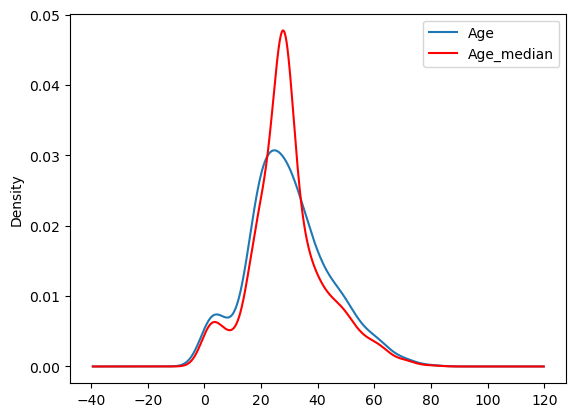

In [22]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax, color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [24]:
##Advantages & disadvantages of mean mode imputations:
####Advantages:
1.Easy to implement(Robust to outliers)
2.faster way to obtain the complete dataset
####Disadvantages
1.change or distortion in orignal variation
2.impacts correlation

# DAY2

# Random Sample Imputation
Aim: Random sample imputation consists of taking random observation from the dataset & we use this observation from the dataset & we use this observation to replace the nan values
when it should be used?
It assumes that the data are missing completely at random(MCAR)


In [25]:
import pandas as pd

df=pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [26]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [27]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [28]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [29]:
df[df['Age'].isnull()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [30]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have random sample to fill Nan, 
    random_sample=df[variable].dropna().sample(df['Age'].isnull().sum(), random_state=0)
    ##pandas need to have same index to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random']=random_sample

In [31]:
median=df.Age.median()

In [32]:
median


28.0

In [33]:
impute_nan(df,'Age',median)

In [34]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

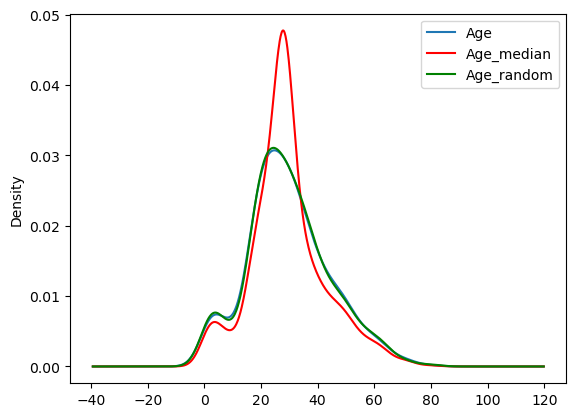

In [38]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax, color='red')
df.Age_random.plot(kind='kde',ax=ax, color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [39]:
#advantage:less distortion, its good to use random sample
#disadvantage: in every situation randomness not work

# 3.Capturing Nan Values with a new feature
It works well if the data are not missing completely at random

In [40]:
import pandas as pd

df=pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [42]:
df['Age_NAN']=np.where(df['Age'].isnull(), 1,0)
df

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [46]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [48]:
df


,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,28.0,23.4500,1
889,1,26.0,30.0000,0


In [49]:
#Advantages:capture importance of missing values
#Disadvantages: Creating additiona features(Curse of Diemensinality)

# 4.End of Distribution Imputation


In [51]:
import pandas as pd

df=pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

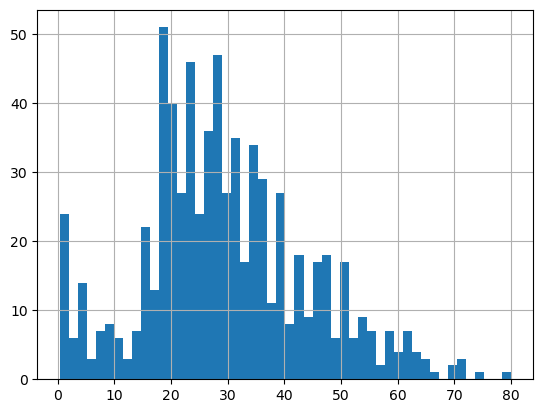

In [53]:
df.Age.hist(bins=50)

In [68]:
extreme=df.Age.mean()+3*df.Age.std()

<Axes: xlabel='Age'>

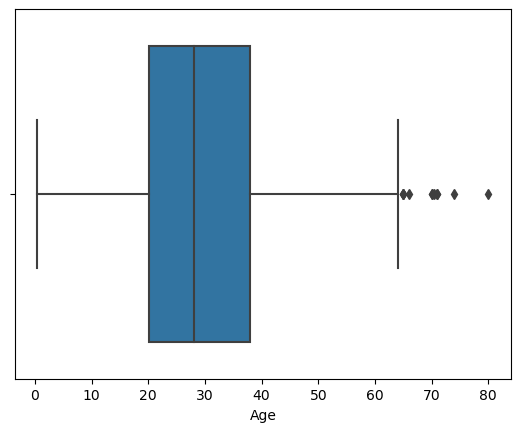

In [69]:
import seaborn as sns
sns.boxplot(x='Age', data=df)

In [70]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [71]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [72]:
df

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
...,...,...,...,...
886,0,27.0,13.0000,27.00000
887,1,19.0,30.0000,19.00000
888,0,28.0,23.4500,73.27861
889,1,26.0,30.0000,26.00000


<Axes: >

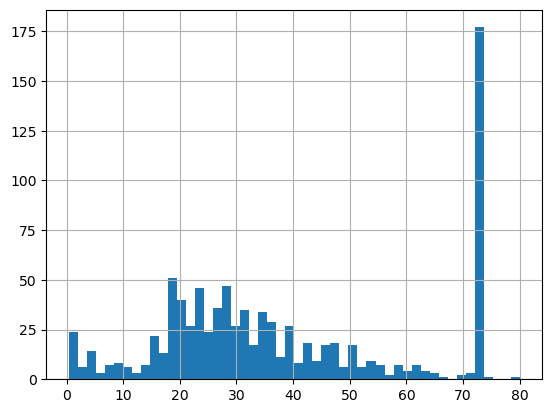

In [74]:
df.Age_end_distribution.hist(bins=50)

<Axes: xlabel='Age_end_distribution'>

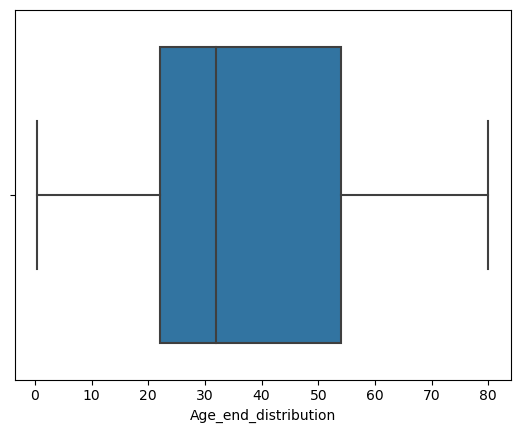

In [76]:
sns.boxplot(x='Age_end_distribution',data=df)

In [77]:
#Advantage: outliers can be removed!

# Arbitary Value Imputation
It consist of replacing NAN by an arbitary value
This techniques derived from kaggle competetion

In [78]:
import pandas as pd

df=pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [81]:
def impute_nan(df,variable):
    df[variable+'_zeros']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

<Axes: >

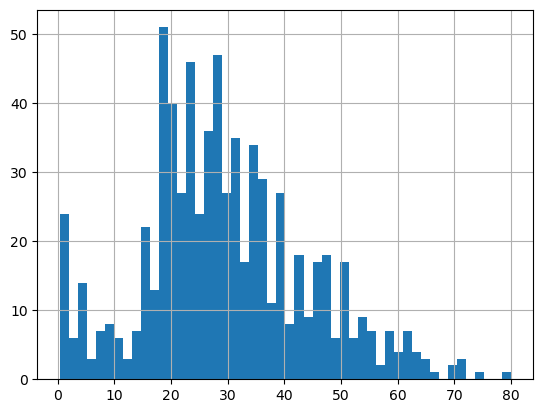

In [82]:
df['Age'].hist(bins=50)


In [84]:
###Arbitary Values
####1. It should be more frequently present
impute_nan(df,'Age')
df

,Survived,Age,Fare,Age_zeros,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,0.0,100.0
889,1,26.0,30.0000,26.0,26.0


# How to handle categorical missing values
Frequent Category imputation

In [87]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [88]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [89]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [92]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [93]:
df.shape

(1460, 4)

##compute the frequency with every feature

In [101]:
df['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

<Axes: xlabel='BsmtQual'>

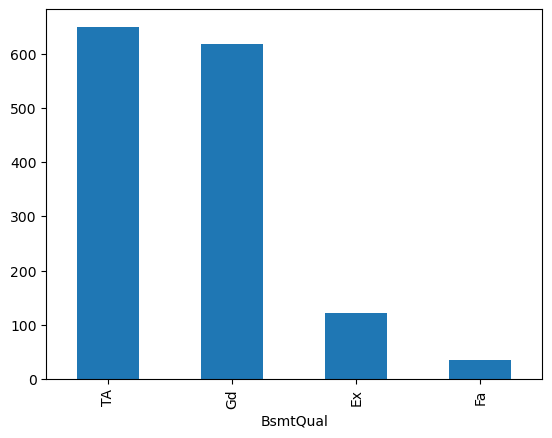

In [106]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

In [115]:
df.groupby(['FireplaceQu']).value_counts()

FireplaceQu  BsmtQual  GarageType  SalePrice
Ex           Ex        Attchd      239686       1
             TA        Detchd      235000       1
                       Attchd      130500       1
                                   295000       1
             Gd        Attchd      410000       1
                                               ..
TA           Gd        BuiltIn     170000       1
                                   180000       1
                                   181000       1
                                   184100       1
             TA        Detchd      475000       1
Name: count, Length: 661, dtype: int64

<Axes: xlabel='GarageType'>

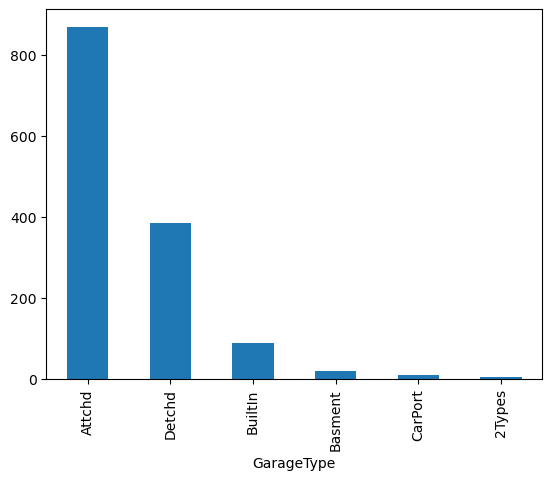

In [116]:
df.groupby(['GarageType'])['GarageType'].count().sort_values(ascending=False).plot.bar()

In [124]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [127]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category, inplace=True)

In [129]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [130]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [131]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

####advantages:
1.Easy to implement
2.Faster way to implement
####Disadvantages:
1.Since we are using most frequent labels, it may use them  in an overrepresented way if there are more nan values
2.it distort the relation of the most frequent label

# Adding a variable to capture NaN

In [134]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [135]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [136]:
import numpy as np
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)

In [137]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0
1456,Gd,TA,Attchd,210000,0
1457,TA,Gd,Attchd,266500,0
1458,TA,NaN,Attchd,142125,0


In [151]:
df['BsmtQual'].mode()[0]

'TA'

In [142]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [143]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [144]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [153]:
df['FireplaceQu'].mode()[0]

'Gd'

In [154]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


####Suppose if you have more frequent categories, we just replace the Nan with new category

In [156]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [157]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [158]:
def impute_nan(df,variable):
    df[variable+'_newvar']=np.where(df[variable].isnull(),"missing",df[variable])
    

In [159]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [160]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
...,...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,Gd,TA,Attchd
1456,Gd,TA,Attchd,210000,Gd,TA,Attchd
1457,TA,Gd,Attchd,266500,TA,Gd,Attchd
1458,TA,NaN,Attchd,142125,TA,missing,Attchd


In [161]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [162]:
df.head()

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


# Handle categorical features:
1.One-Hot Encoding

In [164]:
df=pd.read_csv('Titanic-Dataset.csv', usecols=['Sex'])

In [165]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [168]:
pd.get_dummies(df).head()

,Sex_female,Sex_male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [169]:
pd.get_dummies(df,drop_first=True).astype(int).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [170]:
df=pd.read_csv('Titanic-Dataset.csv', usecols=['Embarked'])

In [171]:
pd.get_dummies(df,drop_first=False).astype(int).head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


###How to perdorm one hot encoding with many categories in features

In [172]:
df=pd.read_csv('mercedesbenz.csv',usecols=['X1','X2','X3','X4','X5','X6','X8'])

In [174]:
df.head()

,X1,X2,X3,X4,X5,X6,X8
0,v,at,a,d,u,j,o
1,t,av,e,d,y,l,o
2,w,n,c,d,x,j,x
3,t,n,f,d,x,l,e
4,v,n,f,d,h,d,n


In [175]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X8    0
dtype: int64

In [179]:
pd.get_dummies(df).astype(int).head()

,X1_a,X1_aa,X1_ab,X1_b,X1_c,X1_d,X1_e,X1_f,X1_g,X1_h,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
for i in df.columns:
    print(len(df[i].unique()))

27
44
7
4
29
12
25


In [186]:
df.X1.value_counts().sort_values(ascending=False).head(10)

X1
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: count, dtype: int64

In [187]:
lst_10=df.X1.value_counts().sort_values(ascending=False).head(10).index

In [188]:
lst_10=list(lst_10)

In [189]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [190]:
for categories in lst_10:
    df[categories]=np.where(df['X1']==categories,1,0)

In [195]:
lst_10.append('X1')

In [196]:
df[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1,X1
0,0,0,0,0,1,0,0,0,0,0,v,v
1,0,0,0,0,0,0,0,0,0,0,t,t
2,0,0,0,0,0,0,0,0,0,0,w,w
3,0,0,0,0,0,0,0,0,0,0,t,t
4,0,0,0,0,1,0,0,0,0,0,v,v
...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s,s
4205,0,0,0,0,0,0,0,0,0,1,o,o
4206,0,0,0,0,1,0,0,0,0,0,v,v
4207,0,0,0,0,0,1,0,0,0,0,r,r


# Ordinal Number encoding

In [197]:
import datetime

In [198]:
today_date=datetime.datetime.today()

In [199]:
today_date

datetime.datetime(2024, 5, 27, 13, 16, 14, 609860)

In [202]:
today_date-datetime.timedelta(1)

datetime.datetime(2024, 5, 26, 13, 16, 14, 609860)

In [205]:
days=[today_date-datetime.timedelta(x) for x in range(0,15)]

In [211]:
data=pd.DataFrame(days)
data.columns=['Day']

In [212]:
data.head()

,Day
0,2024-05-27 13:16:14.609860
1,2024-05-26 13:16:14.609860
2,2024-05-25 13:16:14.609860
3,2024-05-24 13:16:14.609860
4,2024-05-23 13:16:14.609860


In [223]:
data['Day'].dt.month

0     5
1     5
2     5
3     5
4     5
5     5
6     5
7     5
8     5
9     5
10    5
11    5
12    5
13    5
14    5
Name: Day, dtype: int32

In [231]:
import pandas as pd

# Sample DataFrame with datetime column
data = {
    'Day': pd.to_datetime(['2024-05-26 13:16:14.609860', 
                           '2024-05-25 13:16:14.609860', 
                           '2024-05-24 13:16:14.609860', 
                           '2024-05-23 13:16:14.609860'])
}
df = pd.DataFrame(data)

# Add a new column with the name of the day
df['weekday'] = df['Day'].dt.day_name()

# Display the DataFrame
print(df)


                         Day   weekday
0 2024-05-26 13:16:14.609860    Sunday
1 2024-05-25 13:16:14.609860  Saturday
2 2024-05-24 13:16:14.609860    Friday
3 2024-05-23 13:16:14.609860  Thursday


In [232]:
dict={'monday':1,
       'Tuesday':2,
        'wednesday':3,
        'Thursday':4,
        'Friday':5,
         'Saturday':6,
          'Sunday':7}

# Count or Frequency encoding

In [20]:
import pandas as pd
train_set=pd.read_csv(r"C:\Users\SHUBHAM\Downloads\adult\adult.data",header=None,index_col=None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:
train_set.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [26]:
columns=[1,3,5,6,7,8,9,13]

In [28]:
train_set=train_set[columns]

In [30]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [31]:
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [32]:
for feature in train_set.columns[:]:
    print(feature,":",len(train_set[feature].unique()),'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [43]:
country_map=train_set['Country'].value_counts().to_dict()

In [44]:
train_set['Country']=train_set['Country'].map(country_map)
train_set.head(20)

C:\Users\SHUBHAM\AppData\Local\Temp\ipykernel_29296\4014684071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Country']=train_set['Country'].map(country_map)


,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170


In [45]:
####Advantages:
#easy to use & not increasing feature space
####Disadvantage:
# it will provide same weightt if the frequencies are same

# Target Guided ordinal encoding
1.Ordering the labels according to the target
2.replce the labels by the joint probability of being 1 or 0

In [46]:
import pandas as pd
df=pd.read_csv('Titanic-Dataset.csv', usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [47]:
df['Cabin'].fillna('Missing', inplace=True)

In [50]:
df['Cabin']= df['Cabin'].astype(str).str[0]

In [51]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [52]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [57]:
ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [59]:
ordinal_label2={k:i for i,k in enumerate(ordinal_labels)}
ordinal_label2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [62]:
df['Cabin_ordinal_label']=df['Cabin'].map(ordinal_label2)
df.head()

,Survived,Cabin,Cabin_ordinal_label
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


In [63]:
#now we can drop cabin column & use encoded column

# Mean Encoding

In [66]:
mean_ordinal=df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [67]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [71]:
df['mean_ordinal_encode']=df['Cabin'].map(mean_ordinal)
df.head()

,Survived,Cabin,Cabin_ordinal_label,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


In [72]:
#Disadvantage: it prones to overfitting

# Probability Ratio Encoding

In [73]:
import pandas as pd

In [74]:
df=pd.read_csv('Titanic-Dataset.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [77]:
df['Cabin'].fillna("Missing")
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [78]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [80]:
df['Cabin']=df['Cabin'].astype(str).str[0]
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [81]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [83]:
prob_df=df.groupby(['Cabin'])['Survived'].mean()

In [84]:
prob_df=pd.DataFrame(prob_df)

In [85]:
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [87]:
prob_df['Died']=1-prob_df['Survived']
prob_df

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000
F,0.615385,0.384615
G,0.500000,0.500000
M,0.299854,0.700146
T,0.000000,1.000000


In [88]:
prob_df['prob_ratio']=prob_df['Survived']/prob_df['Died']
prob_df.head()

,Survived,Died,prob_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [94]:
probability_encoded=prob_df['prob_ratio'].to_dict()

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [92]:
df['cabin_encoded']=df['Cabin'].map(probability_encoded)

In [93]:
df.head()

,Survived,Cabin,cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
